# Visualization with `seaborn`

In the previous few tutorials we used the built-in plotting capabilities of `pandas` to create some useful financial graphs.  In this tutorial, we recreate those plots using the `seaborn` visualization package.

Like the `pandas` visualization functionality, `seaborn` is built on top of the `matplotlib` package.  As previously discussed, `matplotlib` allows for low level control over visualizations, which makes it very flexible.  However, this flexibility comes at the cost of complexity.  In contrast, `seaborn` provides a high level interface that allows for easy implementations of attractive graphs. 

The focus of `seaborn` is general statistical data visualizations, whereas `pandas` is more tailor-made for financial time series.

This tutorial is not meant to be a comprehensive introduction to `seaborn`.  Rather, my intention is to simply show you the code for a few graphs types that I have found useful in finance. For a thorough introduction to `seaborn`, I recommend working through the official tutorials that are linked in the Further Reading section - they are extremely well done, but quite long.

### Loading Packages

Let's load the packages that we will be using.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Line Graph - Prices, Returns, Realized Vol, VIX

Let's read-in and wrangle some data for SPY during 2016Q1-2021Q2.

In [2]:
df_spy = pdr.get_data_yahoo(['SPY', '^VIX'], start='2016-01-01', end='2021-06-30')
df_spy = df_spy.round(2)
df_spy = df_spy['Close'].reset_index()
df_spy.rename(columns={'Date':'date','SPY':'spy','^VIX':'vix'}, inplace=True)
df_spy.head()

Symbols,date,spy,vix
0,2016-01-04,201.02,20.70
1,2016-01-05,201.36,19.34
2,2016-01-06,198.82,20.59
3,2016-01-07,194.05,24.99
4,2016-01-08,191.92,27.01


Next let's add `returns` and `realized_vol` to the `df_spy`.

In [3]:
df_spy['return'] = df_spy['spy'] / df_spy['spy'].shift(1) - 1
df_spy['realized_vol'] = df_spy['return'].rolling(42).std() * np.sqrt(252)
df_spy.head()

Symbols,date,spy,vix,return,realized_vol
0,2016-01-04,201.02,20.70,NaN,NaN
1,2016-01-05,201.36,19.34,0.001691,NaN
2,2016-01-06,198.82,20.59,-0.012614,NaN
3,2016-01-07,194.05,24.99,-0.023992,NaN
4,2016-01-08,191.92,27.01,-0.010977,NaN


#### Graphing with `pandas`

Recall that `pandas` allows us to quickly graph these four time-series in a single figure.

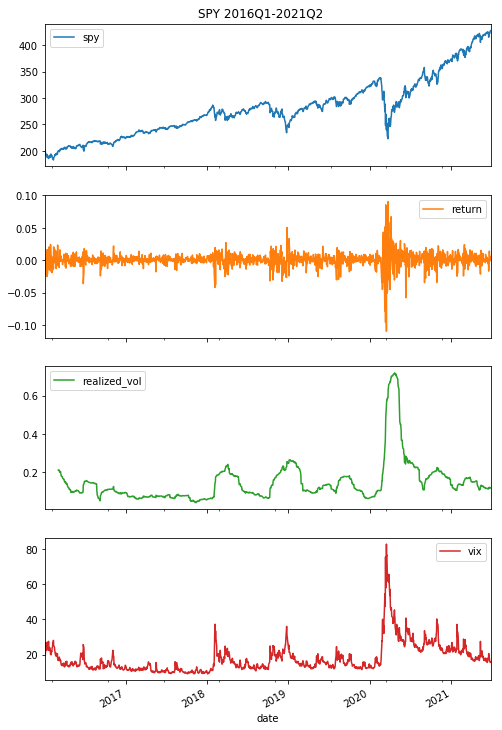

In [4]:
df_spy. \
    plot(
        x = 'date', 
        y = ['spy', 'return', 'realized_vol', 'vix',],
        subplots = True,
        figsize=(8, 12),
        title='SPY 2016Q1-2021Q2',
    );
plt.subplots_adjust(top=0.96); # this adjusts the location of the title

#### Graphing with `seaborn`

Let's create similar graphs with `seaborn`.  Creating all four plots in a single graph is not as easy with `seaborn` and the code is a little confusing.  To keep things simple we will recreate two of the plots separately.

Here is the code that generates the graph of the daily prices:

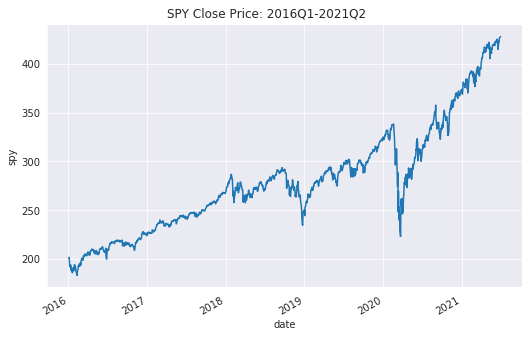

In [5]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(x='date', y='spy', kind='line', data=df_spy, aspect=1.5)
    g.fig.autofmt_xdate()
    # creating and tweaking the title
    g.fig.suptitle('SPY Close Price: 2016Q1-2021Q2')
    plt.subplots_adjust(top=0.93);

And here is the code produces the graph of the daily returns:

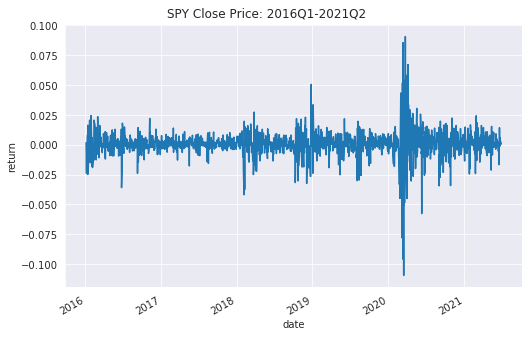

In [6]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(x='date', y='return', kind='line', data=df_spy, aspect=1.5)
    g.fig.autofmt_xdate()
    # creating and tweaking the title
    g.fig.suptitle('SPY Close Price: 2016Q1-2021Q2');
    plt.subplots_adjust(top=0.93);

### Bar Graph - Monthly SPY Call PNLs

Our next data set consists of monthly pnls from the call trades detailed in `spy_call_pnl.csv`.

In [7]:
df_monthly_bar = pd.read_csv('seaborn_monthly_pnl_bar.csv')
df_monthly_bar.head()

,month,year,monthly_pnl
0,1,2018,0.091963
1,2,2018,-2.759090
2,3,2018,-0.340270
3,4,2018,-1.174222
4,5,2018,1.487206


#### Graphing with `pandas`

Recall that this code creates the barplot of the pnls by month using `pandas`:

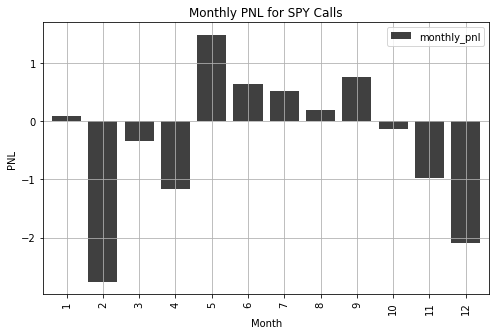

In [8]:
ax = \
    (df_monthly_bar
        .plot(
            x = 'month',
            y = ['monthly_pnl'],
            kind ='bar',
            color='k', # color is grey
            grid=True, # adding a grid
            alpha=0.75, # translucence
            width=0.8, # increasing the width of the bars
            title='Monthly PNL for SPY Calls',
            figsize=(8, 5), # modifying the figure size
        ));

ax.set_xlabel("Month"); # x-axis label
ax.set_ylabel("PNL");   # y-axis label

#### Graphing with `seaborn`

Here is the code that produces a similar graph in using `seaborn`:

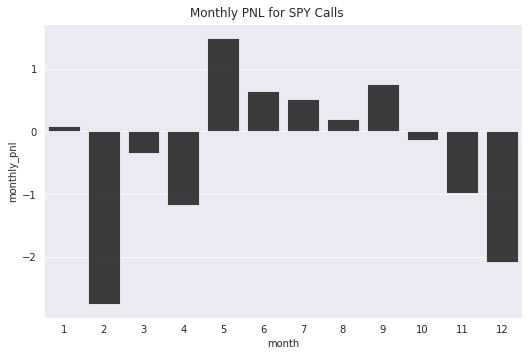

In [9]:
with sns.axes_style('darkgrid'):
    g = sns.catplot(
        x='month'
        , y='monthly_pnl'
        , kind='bar'
        , color='black'
        , alpha=0.75
        , height=5
        , aspect = 1.5
        , data=df_monthly_bar
    );
    plt.subplots_adjust(top=0.93);
    g.fig.suptitle('Monthly PNL for SPY Calls');

### Scatter Plot - SPY Returns vs VIX Change (*implied leverage*)

Let's add `vix_chng` to `df_spy` and change the units to decimals. 

In [10]:
df_spy['vix_chng'] = df_spy['vix'].diff()
df_spy['vix'] = df_spy['vix'] / 100
df_spy['vix_chng'] = df_spy['vix_chng'] / 100
df_spy.head()

Symbols,date,spy,vix,return,realized_vol,vix_chng
0,2016-01-04,201.02,0.2070,NaN,NaN,NaN
1,2016-01-05,201.36,0.1934,0.001691,NaN,-0.0136
2,2016-01-06,198.82,0.2059,-0.012614,NaN,0.0125
3,2016-01-07,194.05,0.2499,-0.023992,NaN,0.0440
4,2016-01-08,191.92,0.2701,-0.010977,NaN,0.0202


#### Graphing with `pandas`

Here is the `pandas` code that creates scatter plot of returns vs VIX changes:

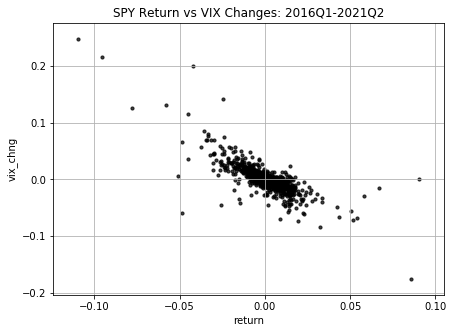

In [11]:
df_spy.plot.scatter(
    x = 'return',
    y = 'vix_chng',
    grid=True ,  
    c='k',
    alpha=0.75,
    s=10, # changing the size of the dots
    figsize=(7, 5),
    title='SPY Return vs VIX Changes: 2016Q1-2021Q2',
);

#### Graphing with `seaborn`

Here is the code for a similar graph using `seaborn`:

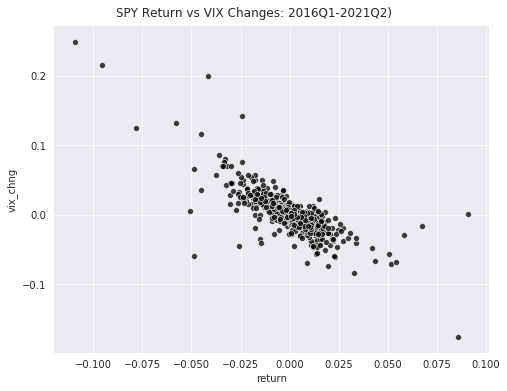

In [12]:
with sns.axes_style('darkgrid'):
    g = sns.relplot(
            x = 'return',
            y = 'vix_chng',
            data = df_spy,
            color = 'black',
            alpha = 0.75,
            height = 5.5,
            aspect = 1.3,
        );
    plt.subplots_adjust(top=0.93);
    g.fig.suptitle('SPY Return vs VIX Changes: 2016Q1-2021Q2)');

### Further Reading

*PDSH* - 4.14 - Visualization with Seaborn

Seaborn Official Tutorials - https://seaborn.pydata.org/tutorial.html (very good, but long)